# Headline Analysis

## Import Dependenices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import custom modules

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.data_loader import DataLoader
from src.sentiment_analysis import SentimentAnalysis

Installing required NLTK resources...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


NLTK resources installed.


[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Loading

In [3]:
# Load your dataset
df = DataLoader.load_csv('../data/raw_analyst_ratings.csv')

In [4]:
# Overview of the dataset
print("---------------------------------")
print("An overview of the dataset: the first 5 rows")
display(df.head())
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the last 5 rows")
display(df.tail())
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the shape of the dataset")
print(df.info())

---------------------------------
An overview of the dataset: the first 5 rows


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


----------------------------------
An overview of the dataset: the last 5 rows


,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


----------------------------------
An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None


## Descriptive Statstics

In [5]:
# 1. Headline length statistics
sentimentAnalysis = SentimentAnalysis(df)
sentimentAnalysis.analyzing_headlines()

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4

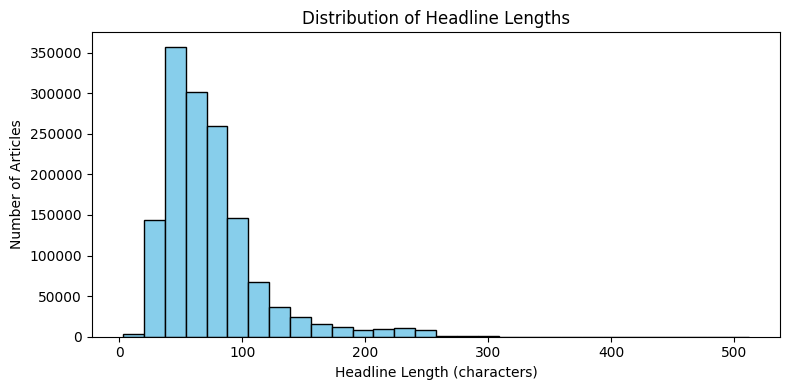

In [6]:
# Plotting the headline length statistics
sentimentAnalysis.plot_headline_length()
plt.show()


Top 10 Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


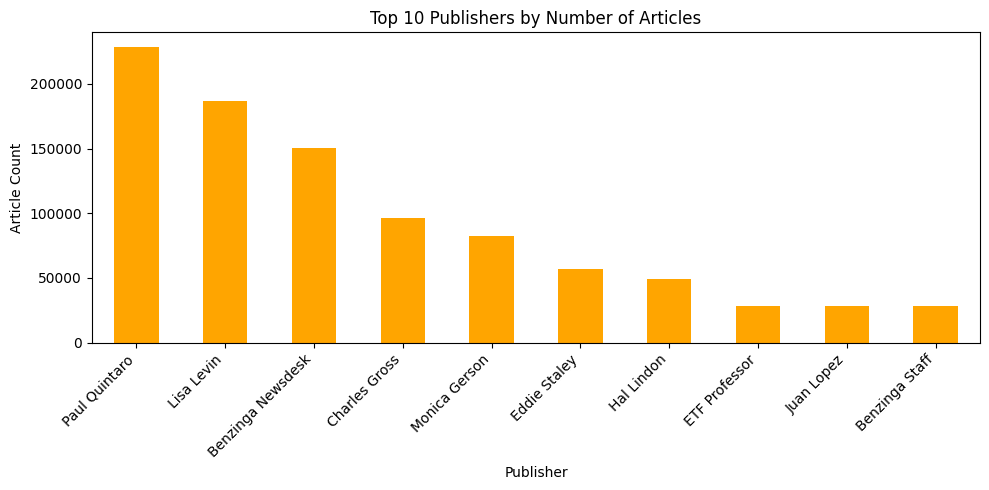

In [7]:
# Analyzing the publisher
sentimentAnalysis.publisher_analysis()
plt.show()

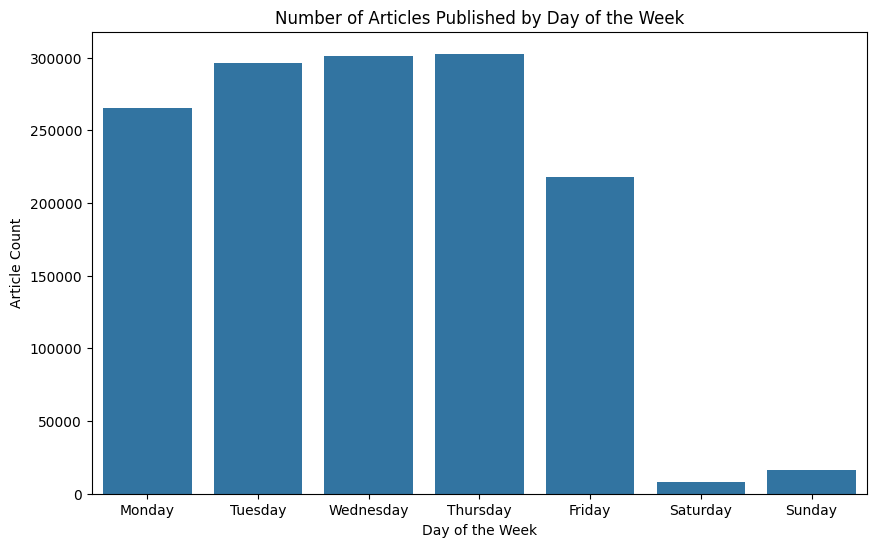

In [8]:
# 3. Distribution of publication times (day of the week)
sentimentAnalysis.format_datetime()
sentimentAnalysis.analyze_publication_frequency()
plt.show()

## Time Series Analysis


Daily Article Counts:
2009-02-14    1
2009-04-27    2
2009-04-29    1
2009-05-22    1
2009-05-27    6
dtype: int64


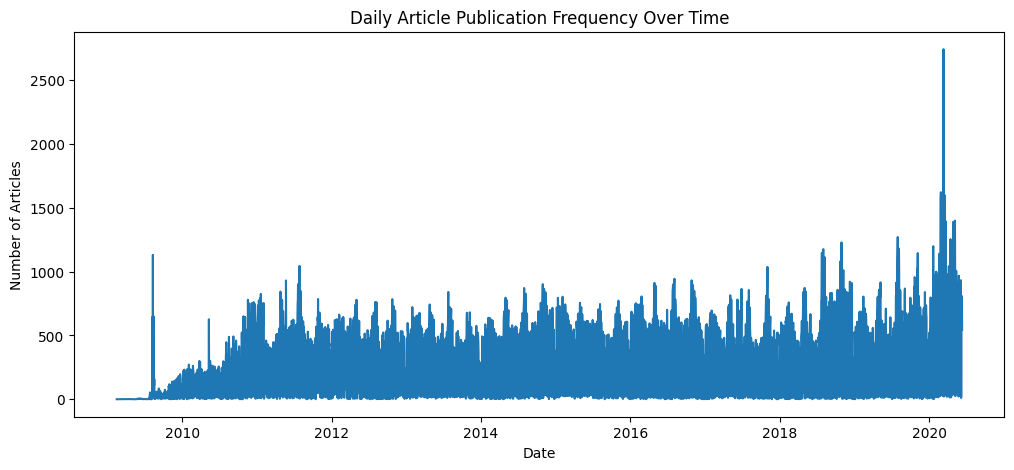

In [9]:
sentimentAnalysis.set_date_index()

# Time series analysis over time
sentimentAnalysis.time_series_analysis_over_time()
plt.show()


Hourly Article Counts:
date
0    1351472
1         82
2         48
3         27
4         67
dtype: int64


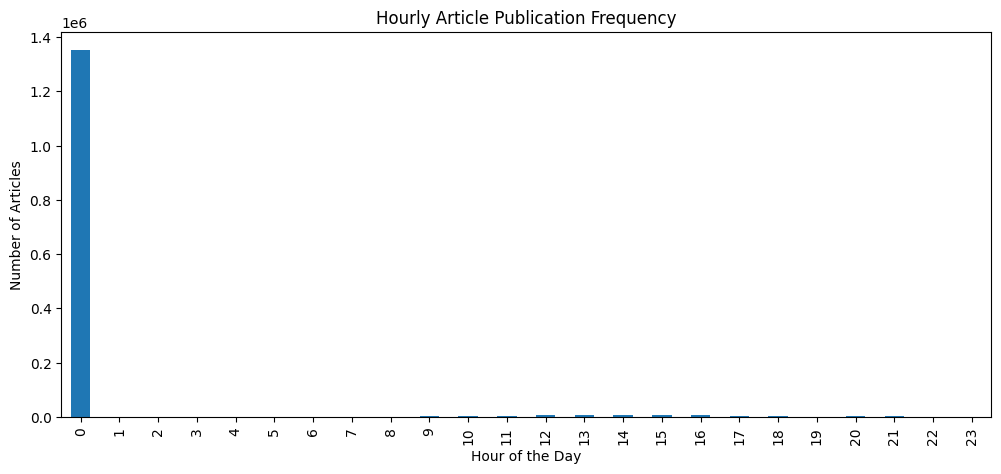

In [10]:
# Time series analysis over hour
sentimentAnalysis.time_series_analysis_over_hour()
plt.show()

## Publisher Analysis

Publisher Share (% of total articles):
publisher
Paul Quintaro        16.227418
Lisa Levin           13.286100
Benzinga Newsdesk    10.692888
Charles Gross         6.873451
Monica Gerson         5.853646
                       ...    
MoneyGeek             0.000071
muathe                0.000071
Robert Morris         0.000071
LeftCoastHedgie       0.000071
Jeremie Capron        0.000071
Name: proportion, Length: 1034, dtype: float64


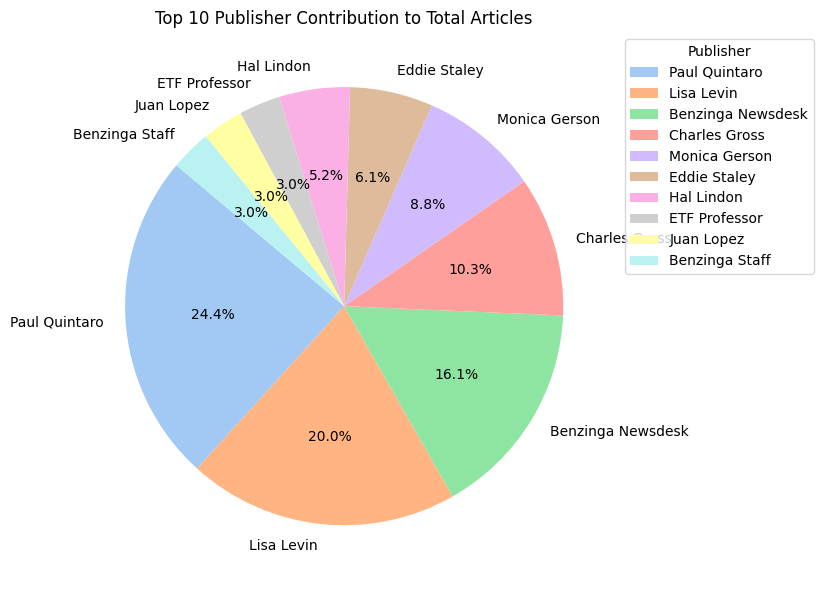

In [11]:
# Analyzing publisher contribution
sentimentAnalysis.publisher_contribution()
plt.show()